# Exploratory Data Analysis (EDA) - Interview Practice

This notebook covers essential EDA concepts and techniques commonly asked in data science interviews.

## Table of Contents
1. **Data Loading and Initial Exploration**
2. **Data Quality Assessment**
3. **Univariate Analysis**
4. **Bivariate Analysis**
5. **Multivariate Analysis**
6. **Missing Data Analysis**
7. **Outlier Detection**
8. **Feature Engineering Insights**
9. **Business Insights and Storytelling**
10. **Common Interview Questions**

In [1]:
# Essential libraries for EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Set style and suppress warnings
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

# Display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

## 1. Data Loading and Initial Exploration

**Key Interview Topics:**
- First steps when given a new dataset
- Understanding data structure and types
- Initial data profiling

In [2]:
# Load sample dataset - using the smartphone dataset which has missing values
df = pd.read_csv('smartphone_cleaned_v5.csv')

# Initial exploration - The "5 W's" of data
print("=== DATASET OVERVIEW ===")
print(f"Shape: {df.shape}")
print(f"\nColumn names: {list(df.columns)}")

print(f"\nData types:")
print(df.dtypes.value_counts())

print("\n=== FIRST 5 ROWS ===")
print(df.head())

print("\n=== MISSING VALUES PREVIEW ===")
print(f"Total missing values: {df.isnull().sum().sum()}")
print(f"Columns with missing values:")
for col in df.columns:
    missing_count = df[col].isnull().sum()
    if missing_count > 0:
        print(f"  {col}: {missing_count} missing values ({missing_count/len(df)*100:.1f}%)")

=== DATASET OVERVIEW ===
Shape: (980, 25)

Column names: ['brand_name', 'model', 'price', 'rating', 'has_5g', 'has_nfc', 'has_ir_blaster', 'processor_brand', 'num_cores', 'processor_speed', 'battery_capacity', 'fast_charging_available', 'fast_charging', 'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate', 'resolution', 'num_rear_cameras', 'num_front_cameras', 'os', 'primary_camera_rear', 'primary_camera_front', 'extended_memory_available', 'extended_upto']

Data types:
float64    12
object      5
int64       5
bool        3
Name: count, dtype: int64

=== FIRST 5 ROWS ===
  brand_name                      model  price  rating  has_5g  has_nfc  \
0    oneplus              OnePlus 11 5G  54999    89.0    True     True   
1    oneplus  OnePlus Nord CE 2 Lite 5G  19989    81.0    True    False   
2    samsung      Samsung Galaxy A14 5G  16499    75.0    True    False   
3   motorola       Motorola Moto G62 5G  14999    81.0    True    False   
4     realme         Realme 10 Pro

In [3]:
# Essential methods for initial exploration
print("=== BASIC INFO ===")
df.info()

print("\n=== STATISTICAL SUMMARY ===")
df.describe(include='all')

=== BASIC INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 980 entries, 0 to 979
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   brand_name                 980 non-null    object 
 1   model                      980 non-null    object 
 2   price                      980 non-null    int64  
 3   rating                     879 non-null    float64
 4   has_5g                     980 non-null    bool   
 5   has_nfc                    980 non-null    bool   
 6   has_ir_blaster             980 non-null    bool   
 7   processor_brand            960 non-null    object 
 8   num_cores                  974 non-null    float64
 9   processor_speed            938 non-null    float64
 10  battery_capacity           969 non-null    float64
 11  fast_charging_available    980 non-null    int64  
 12  fast_charging              769 non-null    float64
 13  ram_capacity               980 

,brand_name,model,price,rating,has_5g,has_nfc,has_ir_blaster,processor_brand,num_cores,processor_speed,battery_capacity,fast_charging_available,fast_charging,ram_capacity,internal_memory,screen_size,refresh_rate,resolution,num_rear_cameras,num_front_cameras,os,primary_camera_rear,primary_camera_front,extended_memory_available,extended_upto
count,980,980,980.000000,879.000000,980,980,980,960,974.000000,938.000000,969.000000,980.000000,769.000000,980.000000,980.000000,980.000000,980.000000,980,980.000000,976.000000,966,980.000000,975.000000,980.000000,500.000000
unique,46,980,NaN,NaN,2,2,2,13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,83,NaN,NaN,3,NaN,NaN,NaN,NaN
top,xiaomi,Samsung Galaxy M52s 5G,NaN,NaN,True,False,False,snapdragon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1080 x 2400,NaN,NaN,android,NaN,NaN,NaN,NaN
freq,134,1,NaN,NaN,549,587,821,413,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,342,NaN,NaN,909,NaN,NaN,NaN,NaN
mean,NaN,NaN,32520.504082,78.258248,NaN,NaN,NaN,NaN,7.772074,2.427217,4817.748194,0.854082,46.126138,6.560204,141.036735,6.536765,92.256122,NaN,2.814286,1.029713,NaN,50.319286,16.589128,0.630612,736.064000
std,NaN,NaN,39531.812669,7.402854,NaN,NaN,NaN,NaN,0.836845,0.464090,1009.540054,0.353205,34.277870,2.744378,107.134516,0.349162,28.988052,NaN,0.776441,0.169882,NaN,33.000968,10.876802,0.482885,366.894911
min,NaN,NaN,3499.000000,60.000000,NaN,NaN,NaN,NaN,4.000000,1.200000,1821.000000,0.000000,10.000000,1.000000,8.000000,3.540000,60.000000,NaN,1.000000,1.000000,NaN,2.000000,0.300000,0.000000,32.000000
25%,NaN,NaN,12999.000000,74.000000,NaN,NaN,NaN,NaN,8.000000,2.050000,4500.000000,1.000000,18.000000,4.000000,64.000000,6.500000,60.000000,NaN,2.000000,1.000000,NaN,24.000000,8.000000,0.000000,512.000000
50%,NaN,NaN,19994.500000,80.000000,NaN,NaN,NaN,NaN,8.000000,2.300000,5000.000000,1.000000,33.000000,6.000000,128.000000,6.580000,90.000000,NaN,3.000000,1.000000,NaN,50.000000,16.000000,1.000000,1024.000000
75%,NaN,NaN,35491.500000,84.000000,NaN,NaN,NaN,NaN,8.000000,2.840000,5000.000000,1.000000,66.000000,8.000000,128.000000,6.670000,120.000000,NaN,3.000000,1.000000,NaN,64.000000,16.000000,1.000000,1024.000000


## 2. Data Quality Assessment

**Key Interview Topics:**
- Missing values analysis
- Duplicate detection
- Data consistency checks
- Data validation techniques

In [4]:
# Data Quality Assessment Function
def data_quality_report(df):
    """
    Comprehensive data quality assessment - commonly asked in interviews
    """
    print("=== DATA QUALITY REPORT ===")
    
    # Missing values
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    missing_df = pd.DataFrame({
        'Missing_Count': missing_data,
        'Missing_Percentage': missing_percent
    }).sort_values('Missing_Percentage', ascending=False)
    
    print("\n1. MISSING VALUES:")
    print(missing_df[missing_df['Missing_Count'] > 0])
    
    # Duplicates
    duplicates = df.duplicated().sum()
    print(f"\n2. DUPLICATE ROWS: {duplicates}")
    
    # Data types consistency
    print("\n3. DATA TYPES:")
    for col in df.columns:
        unique_count = df[col].nunique()
        print(f"{col}: {df[col].dtype} | Unique values: {unique_count}")
    
    # Memory usage
    memory_usage = df.memory_usage(deep=True).sum() / 1024**2
    print(f"\n4. MEMORY USAGE: {memory_usage:.2f} MB")
    
    return missing_df

# Run quality assessment
quality_report = data_quality_report(df)

=== DATA QUALITY REPORT ===

1. MISSING VALUES:
                      Missing_Count  Missing_Percentage
extended_upto                   480           48.979592
fast_charging                   211           21.530612
rating                          101           10.306122
processor_speed                  42            4.285714
processor_brand                  20            2.040816
os                               14            1.428571
battery_capacity                 11            1.122449
num_cores                         6            0.612245
primary_camera_front              5            0.510204
num_front_cameras                 4            0.408163

2. DUPLICATE ROWS: 0

3. DATA TYPES:
brand_name: object | Unique values: 46
model: object | Unique values: 980
price: int64 | Unique values: 379
rating: float64 | Unique values: 30
has_5g: bool | Unique values: 2
has_nfc: bool | Unique values: 2
has_ir_blaster: bool | Unique values: 2
processor_brand: object | Unique values: 13
num_c

## 3. Univariate Analysis

**Key Interview Topics:**
- Distribution analysis (normal, skewed, bimodal)
- Central tendency and spread
- Categorical variable analysis
- Visualization techniques

### Common Distribution Patterns

**Normal Distribution:**
- Bell-shaped curve
- Mean = Median = Mode
- Skewness ≈ 0, Kurtosis ≈ 3

**Right-Skewed (Positive Skew):**
- Tail extends to the right
- Mean > Median
- Common in: Income, house prices

**Left-Skewed (Negative Skew):**
- Tail extends to the left
- Mean < Median
- Common in: Age at death, exam scores

**Bimodal:**
- Two distinct peaks
- May indicate mixed populations
- Example: Height data with both males and females

In [5]:
# Separate numerical and categorical columns
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist() 
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()

print(f"Numerical columns ({len(numerical_cols)}): {numerical_cols}") 
print(f"Categorical columns ({len(categorical_cols)}): {categorical_cols}")

# Function for numerical variable analysis
def analyze_numerical_variable(df, column):
    """
    Comprehensive numerical variable analysis
    """
    print(f"\n=== ANALYSIS: {column.upper()} ===")
    
    # Basic statistics
    stats_dict = {
        'Mean': df[column].mean(),
        'Median': df[column].median(),
        'Mode': df[column].mode().iloc[0] if not df[column].mode().empty else 'No mode',
        'Std Dev': df[column].std(),
        'Variance': df[column].var(),
        'Skewness': df[column].skew(),
        'Kurtosis': df[column].kurtosis(),
        'Min': df[column].min(),
        'Max': df[column].max(),
        'Range': df[column].max() - df[column].min(),
        'IQR': df[column].quantile(0.75) - df[column].quantile(0.25)
    }
    
    for stat, value in stats_dict.items():
        if isinstance(value, (int, float)):
            print(f"{stat}: {value:.3f}")
        else:
            print(f"{stat}: {value}")
    
    # Distribution interpretation
    skew = df[column].skew() # Calculate skewness
    if abs(skew) < 0.5: # Interpretation of skewness
        skew_interpretation = "approximately normal" # close to zero skewness
    elif skew > 0.5:    # positive skewness
        skew_interpretation = "right-skewed (positive skew)"  
    else:
        skew_interpretation = "left-skewed (negative skew)"
    
    print(f"\nDistribution: {skew_interpretation}")
    
    return stats_dict

# Analyze a numerical variable (if available)
if numerical_cols:
    sample_num_col = numerical_cols[0]
    num_stats = analyze_numerical_variable(df, sample_num_col)

Numerical columns (17): ['price', 'rating', 'num_cores', 'processor_speed', 'battery_capacity', 'fast_charging_available', 'fast_charging', 'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras', 'num_front_cameras', 'primary_camera_rear', 'primary_camera_front', 'extended_memory_available', 'extended_upto']
Categorical columns (5): ['brand_name', 'model', 'processor_brand', 'resolution', 'os']

=== ANALYSIS: PRICE ===
Mean: 32520.504
Median: 19994.500
Mode: 14999
Std Dev: 39531.813
Variance: 1562764212.886
Skewness: 6.592
Kurtosis: 79.192
Min: 3499
Max: 650000
Range: 646501
IQR: 22492.500

Distribution: right-skewed (positive skew)


In [6]:
# Function for categorical variable analysis
def analyze_categorical_variable(df, column):
    """
    Comprehensive categorical variable analysis
    """
    print(f"\n=== ANALYSIS: {column.upper()} ===")
    
    # Value counts and percentages
    value_counts = df[column].value_counts()
    percentages = df[column].value_counts(normalize=True) * 100
    
    analysis_df = pd.DataFrame({
        'Count': value_counts,
        'Percentage': percentages
    })
    
    print(f"Unique values: {df[column].nunique()}")
    print(f"Most frequent: {value_counts.index[0]} ({value_counts.iloc[0]} occurrences)")
    print(f"Least frequent: {value_counts.index[-1]} ({value_counts.iloc[-1]} occurrences)")
    
    # Check for high cardinality
    cardinality_ratio = df[column].nunique() / len(df)
    if cardinality_ratio > 0.5:
        print("⚠️  HIGH CARDINALITY detected - consider grouping categories")
    
    print("\nValue distribution:")
    print(analysis_df.head(10))
    
    return analysis_df

# Analyze a categorical variable
if categorical_cols:
    sample_cat_col = categorical_cols[0]
    cat_stats = analyze_categorical_variable(df, sample_cat_col)


=== ANALYSIS: BRAND_NAME ===
Unique values: 46
Most frequent: xiaomi (134 occurrences)
Least frequent: blackview (1 occurrences)

Value distribution:
            Count  Percentage
brand_name                   
xiaomi        134   13.673469
samsung       132   13.469388
vivo          111   11.326531
realme         97    9.897959
oppo           88    8.979592
motorola       52    5.306122
apple          46    4.693878
oneplus        42    4.285714
poco           41    4.183673
tecno          33    3.367347


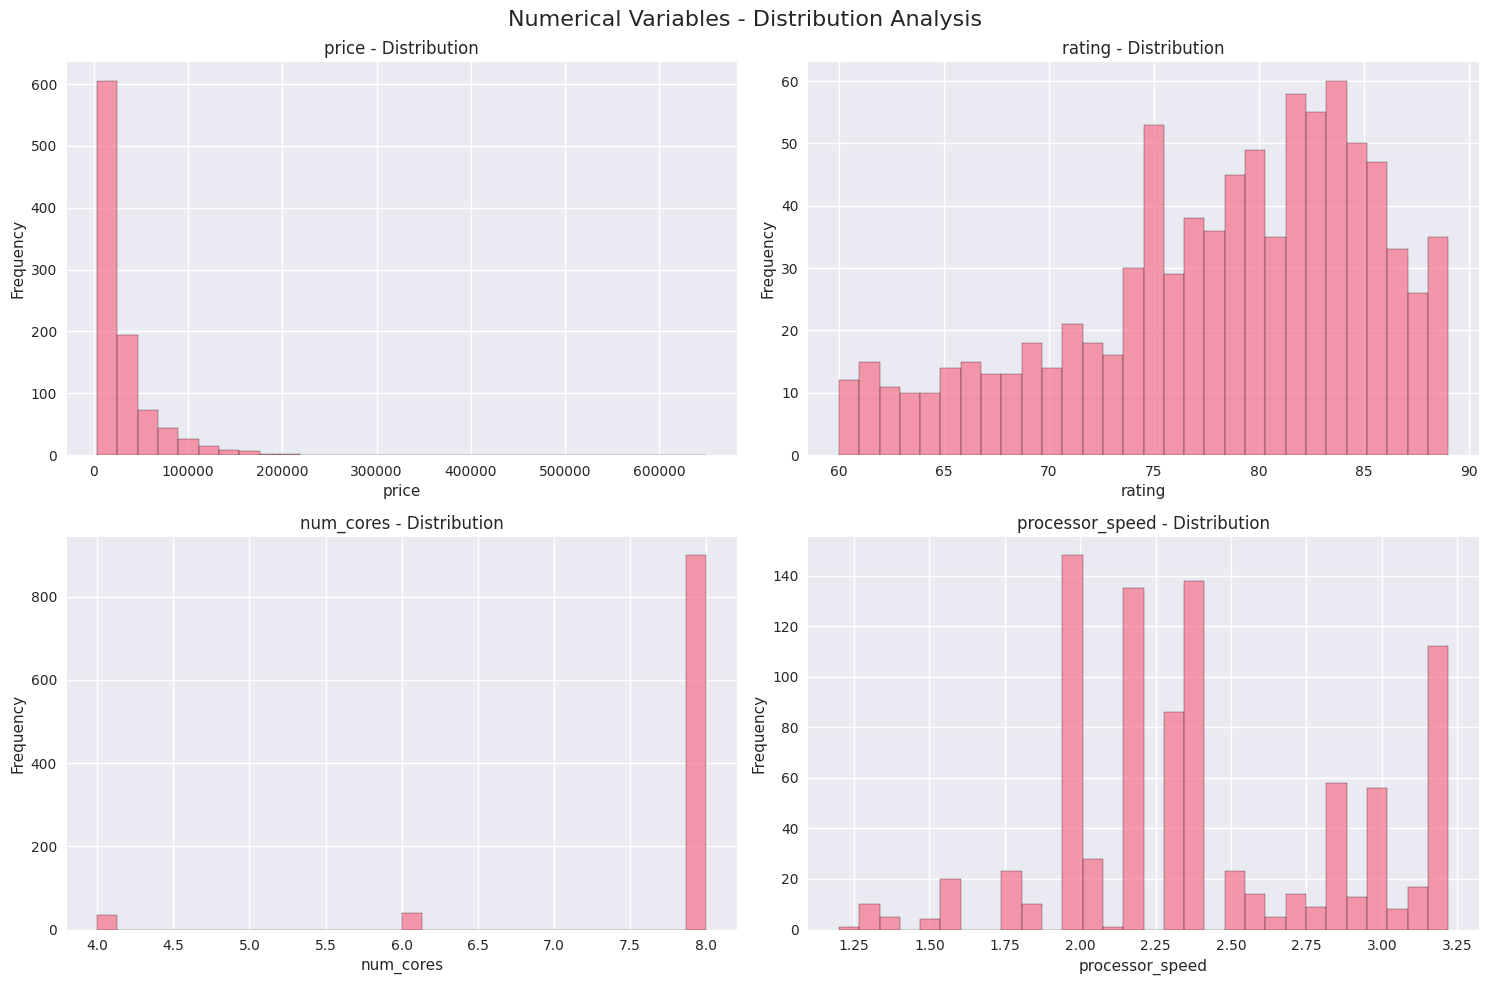

In [7]:
# Visualization Function: Numerical Variables
def plot_numerical_univariate(df, numerical_cols, max_plots=4):
    """
    Create histograms for numerical variables
    """
    if not numerical_cols:
        print("No numerical columns for visualization")
        return
    
    n_plots = min(len(numerical_cols), max_plots)
    n_cols = min(n_plots, 2)
    n_rows = (n_plots + 1) // 2
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5*n_rows))
    fig.suptitle('Numerical Variables - Distribution Analysis', fontsize=16)
    
    if n_plots == 1:
        axes = [axes]
    elif n_rows == 1:
        axes = [axes] if n_cols == 1 else axes
    else:
        axes = axes.flatten()
    
    for i, col in enumerate(numerical_cols[:max_plots]):
        ax = axes[i] if n_plots > 1 else axes[0]
        ax.hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
        ax.set_title(f'{col} - Distribution')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
    
    # Hide unused subplots
    for i in range(n_plots, len(axes)):
        axes[i].set_visible(False)
    
    plt.tight_layout()
    plt.show()

# Create plots
plot_numerical_univariate(df, numerical_cols)

In [8]:
# Visualization Function: Categorical Variables
def plot_categorical_univariate(df, categorical_cols, max_plots=2):
    """
    Create bar charts for categorical variables
    """
    if not categorical_cols:
        print("No categorical columns for visualization")
        return
    
    n_plots = min(len(categorical_cols), max_plots)
    fig, axes = plt.subplots(1, n_plots, figsize=(8*n_plots, 6))
    fig.suptitle('Categorical Variables - Distribution Analysis', fontsize=16)
    
    if n_plots == 1:
        axes = [axes]
    
    for i, col in enumerate(categorical_cols[:max_plots]):
        ax = axes[i] if n_plots > 1 else axes[0]
        
        value_counts = df[col].value_counts().head(10)
        ax.bar(range(len(value_counts)), value_counts.values)
        ax.set_title(f'{col} - Top 10 Categories')
        ax.set_xlabel('Categories')
        ax.set_ylabel('Count')
        ax.set_xticks(range(len(value_counts)))
        ax.set_xticklabels(value_counts.index, rotation=45, ha='right')
    
    plt.tight_layout()
    plt.show()

Creating univariate analysis visualizations...

Plotting 17 numerical variables:


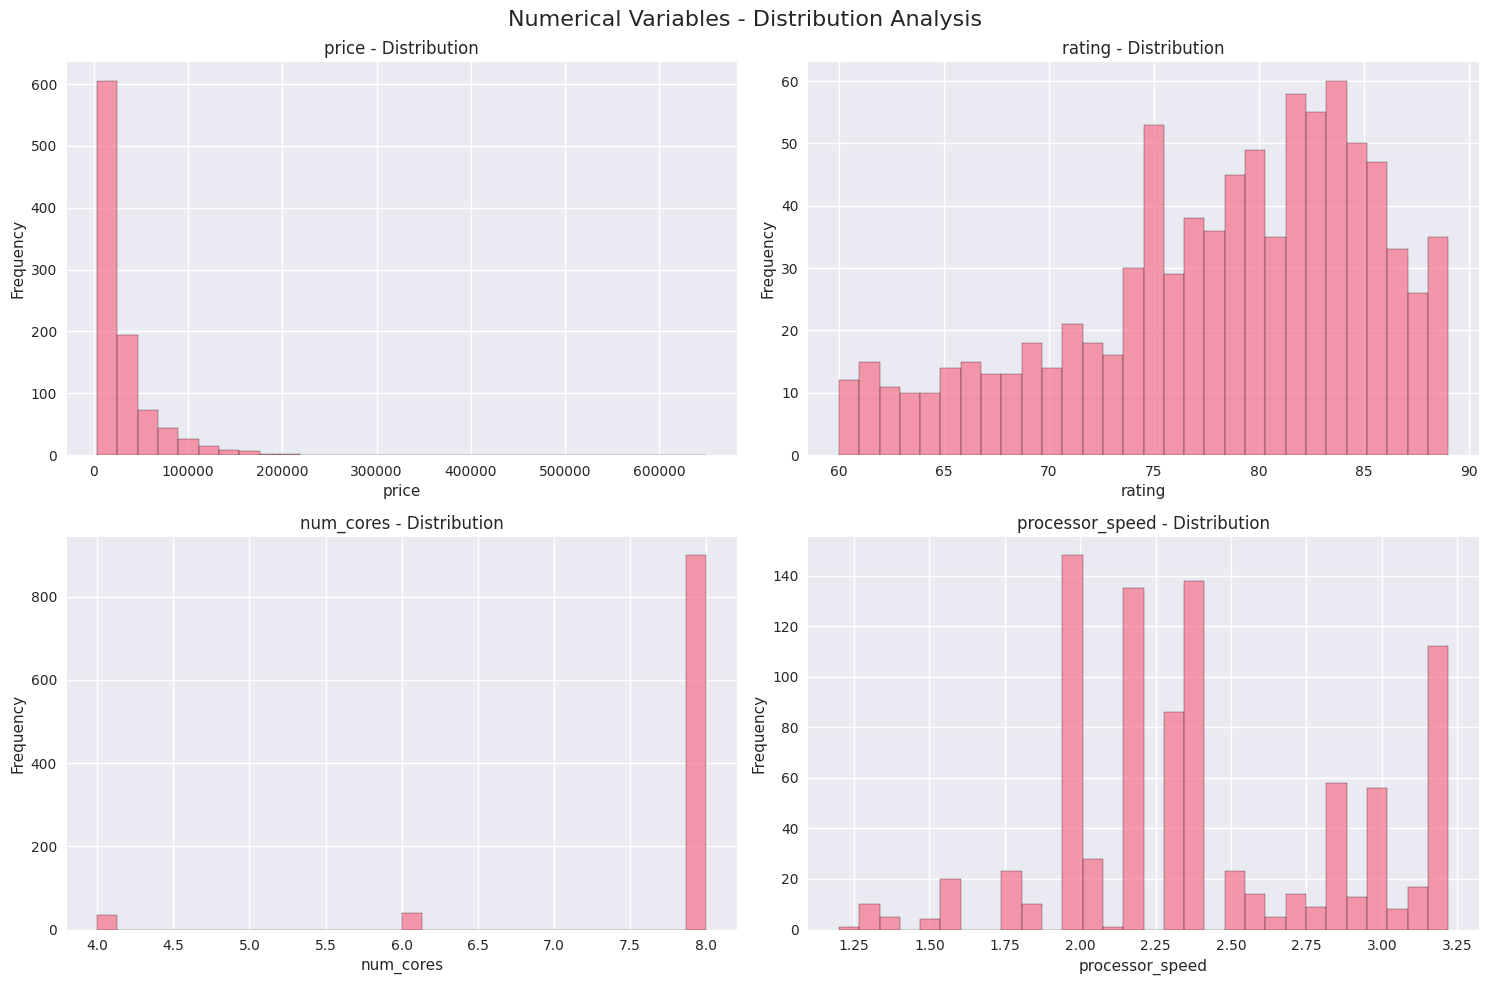


Plotting 5 categorical variables:


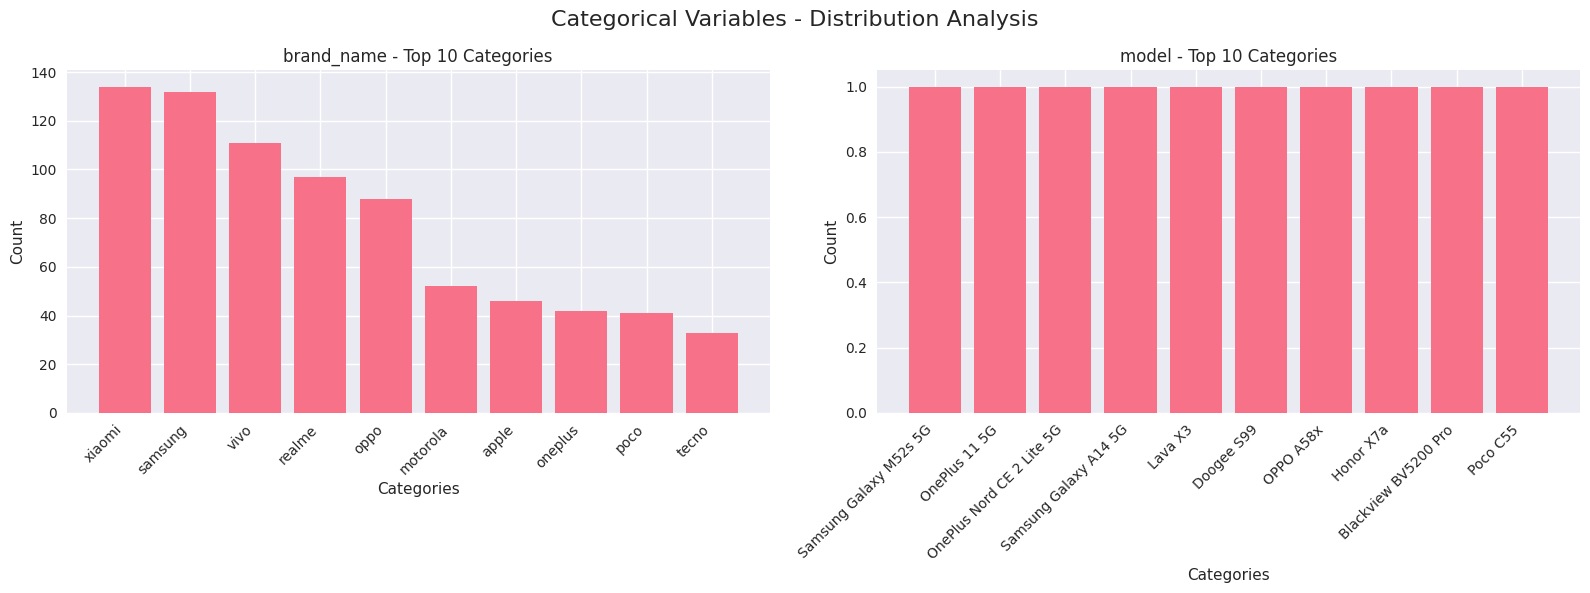

In [9]:
# Run Univariate Visualizations
print("Creating univariate analysis visualizations...")

# Plot numerical variables
if numerical_cols:
    print(f"\nPlotting {len(numerical_cols)} numerical variables:")
    plot_numerical_univariate(df, numerical_cols)
else:
    print("No numerical columns found for plotting")

# Plot categorical variables
if categorical_cols:
    print(f"\nPlotting {len(categorical_cols)} categorical variables:")
    plot_categorical_univariate(df, categorical_cols)
else:
    print("No categorical columns found for plotting")

## 4. Bivariate Analysis

**Key Interview Topics:**
- Correlation analysis
- Relationship between variables
- Chi-square test for categorical variables
- Scatter plots and trend analysis

=== CORRELATION ANALYSIS ===

Strong correlations (|r| > 0.7):
rating vs ram_capacity: 0.758


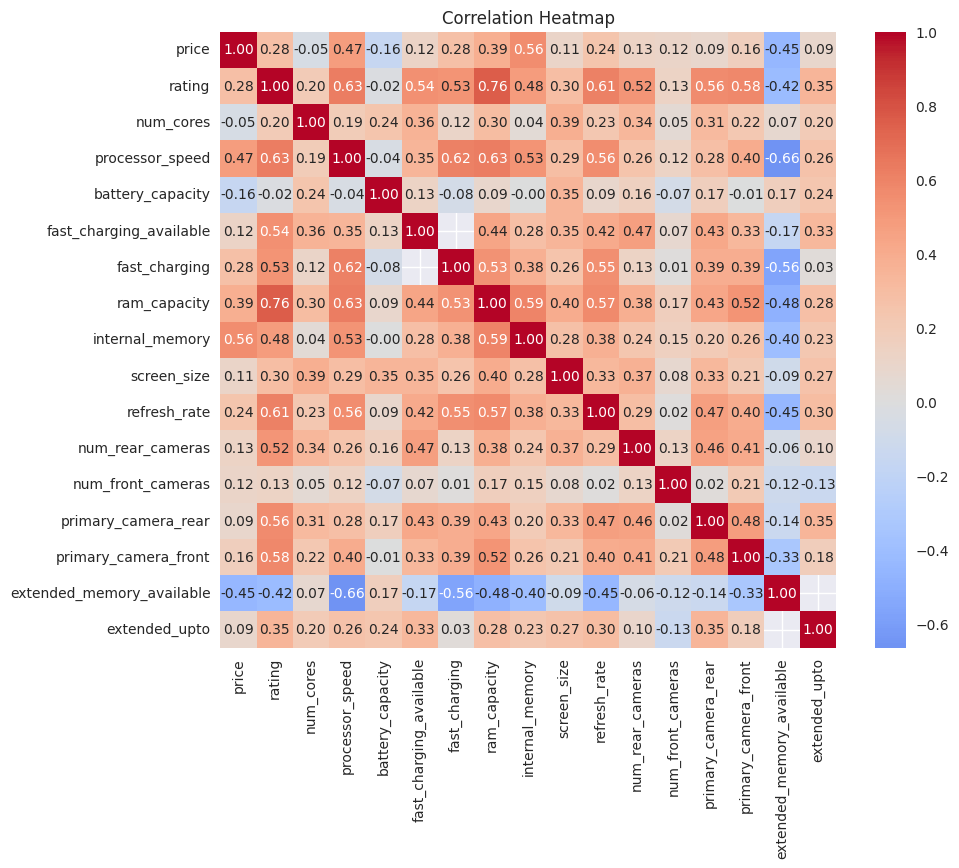

In [10]:
# Bivariate Analysis Functions
def correlation_analysis(df, numerical_cols): # pylint: disable=too-many-locals
    """
    Comprehensive correlation analysis
    """
    if len(numerical_cols) < 2: 
        print("Need at least 2 numerical columns for correlation analysis")
        return
    
    print("=== CORRELATION ANALYSIS ===")
    
    # Correlation matrix
    corr_matrix = df[numerical_cols].corr()
    
    # Find strong correlations
    strong_corr = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            corr_val = corr_matrix.iloc[i, j]
            if abs(corr_val) > 0.7:  # Strong correlation threshold
                strong_corr.append({
                    'Variable 1': corr_matrix.columns[i],
                    'Variable 2': corr_matrix.columns[j],
                    'Correlation': corr_val
                })
    
    if strong_corr:
        print("\nStrong correlations (|r| > 0.7):")
        for corr in strong_corr:
            print(f"{corr['Variable 1']} vs {corr['Variable 2']}: {corr['Correlation']:.3f}")
    else:
        print("\nNo strong correlations found (|r| > 0.7)")
    
    # Visualization
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0,
                square=True, fmt='.2f')
    plt.title('Correlation Heatmap')
    plt.show()
    
    return corr_matrix

# Run correlation analysis
if len(numerical_cols) >= 2:
    corr_matrix = correlation_analysis(df, numerical_cols)
else:
    print("Not enough numerical columns for correlation analysis")

### Correlation Interpretation Guidelines

**Correlation Strength:**
- **0.0 to 0.3:** Weak correlation
- **0.3 to 0.7:** Moderate correlation  
- **0.7 to 1.0:** Strong correlation

**Important Notes:**
- Correlation measures **linear** relationships only
- Always visualize with scatter plots
- Consider **Spearman correlation** for non-linear relationships
- **Correlation ≠ Causation** - always remember this!

In [11]:
# Categorical vs Numerical Analysis
def analyze_cat_vs_num(df, cat_col, num_col):
    """
    Analyze relationship between categorical and numerical variables
    """
    print(f"\n=== {cat_col.upper()} vs {num_col.upper()} ===")
    
    # Group statistics
    group_stats = df.groupby(cat_col)[num_col].agg([
        'count', 'mean', 'median', 'std', 'min', 'max'
    ]).round(3)
    
    print("Group Statistics:")
    print(group_stats)
    
    return group_stats

# Example analysis (if we have both categorical and numerical columns)
if categorical_cols and numerical_cols:
    example_analysis = analyze_cat_vs_num(df, categorical_cols[0], numerical_cols[0])


=== BRAND_NAME vs PRICE ===
Group Statistics:
            count        mean    median        std     min     max
brand_name                                                        
apple          46   95966.522   84994.5  43386.619   29990  182999
asus            7   74709.429   72999.0  21106.868   39999  107990
blackview       1    8990.000    8990.0        NaN    8990    8990
blu             1   14990.000   14990.0        NaN   14990   14990
cat             1   14999.000   14999.0        NaN   14999   14999
cola            1   14999.000   14999.0        NaN   14999   14999
doogee          2   30499.000   30499.0  21920.310   14999   45999
duoqin          1    9990.000    9990.0        NaN    9990    9990
gionee          3    6896.000    6999.0    660.551    6190    7499
google         14   44332.571   38240.0  22096.844   15990   81999
honor          13   30301.846   24990.0  23204.339    9999   94990
huawei         16   80177.250   45494.5  75713.235   10949  239999
ikall          

In [12]:
# ANOVA Test for Categorical vs Numerical Analysis
def perform_anova_test(df, cat_col, num_col):
    """
    Perform ANOVA test to check if there are significant differences between groups
    """
    groups = [df[df[cat_col] == cat][num_col].dropna() for cat in df[cat_col].unique()]
    
    if len(groups) > 2:
        f_stat, p_value = stats.f_oneway(*groups)
        print(f"\nANOVA Test Results:")
        print(f"F-statistic: {f_stat:.3f}")
        print(f"P-value: {p_value:.3f}")
        
        if p_value < 0.05:
            print("✅ Significant difference between groups (p < 0.05)")
        else:
            print("❌ No significant difference between groups (p >= 0.05)")
        
        return f_stat, p_value
    else:
        print("Need more than 2 groups for ANOVA test")
        return None, None

In [13]:
# Visualization: Categorical vs Numerical
def plot_cat_vs_num(df, cat_col, num_col):
    """
    Create visualizations for categorical vs numerical analysis
    """
    plt.figure(figsize=(12, 5))
    
    # Box plot
    plt.subplot(1, 2, 1)
    sns.boxplot(data=df, x=cat_col, y=num_col)
    plt.xticks(rotation=45)
    plt.title(f'{num_col} by {cat_col}')
    
    # Violin plot
    plt.subplot(1, 2, 2)
    sns.violinplot(data=df, x=cat_col, y=num_col)
    plt.xticks(rotation=45)
    plt.title(f'{num_col} Distribution by {cat_col}')
    
    plt.tight_layout()
    plt.show()

Analyzing relationship between brand_name (categorical) and price (numerical)

=== BRAND_NAME vs PRICE ===
Group Statistics:
            count        mean    median        std     min     max
brand_name                                                        
apple          46   95966.522   84994.5  43386.619   29990  182999
asus            7   74709.429   72999.0  21106.868   39999  107990
blackview       1    8990.000    8990.0        NaN    8990    8990
blu             1   14990.000   14990.0        NaN   14990   14990
cat             1   14999.000   14999.0        NaN   14999   14999
cola            1   14999.000   14999.0        NaN   14999   14999
doogee          2   30499.000   30499.0  21920.310   14999   45999
duoqin          1    9990.000    9990.0        NaN    9990    9990
gionee          3    6896.000    6999.0    660.551    6190    7499
google         14   44332.571   38240.0  22096.844   15990   81999
honor          13   30301.846   24990.0  23204.339    9999   94990
huaw

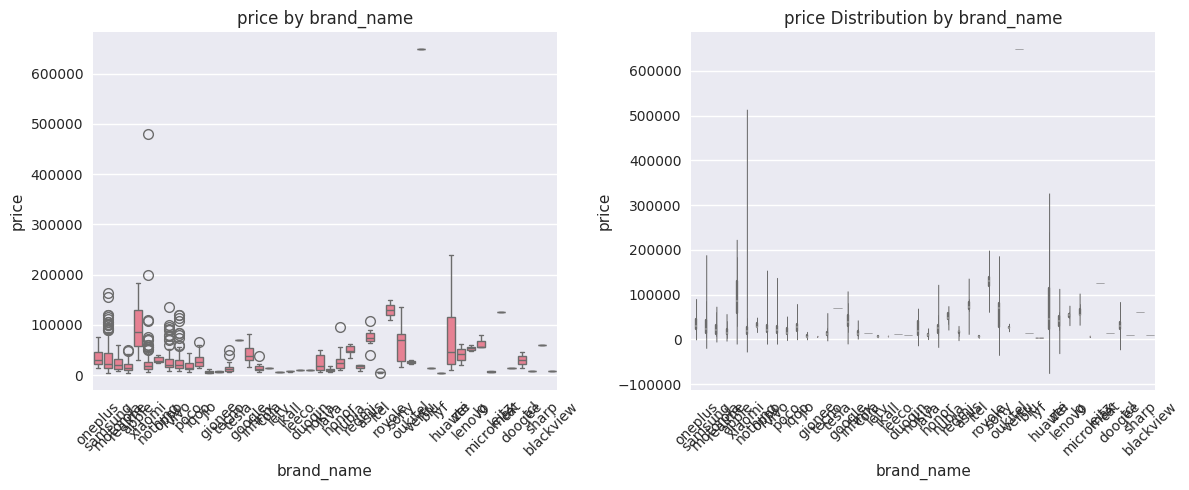

In [14]:
# Example: Run Categorical vs Numerical Analysis
if categorical_cols and numerical_cols:
    # Get first categorical and numerical columns for example
    example_cat = categorical_cols[0]
    example_num = numerical_cols[0]
    
    print(f"Analyzing relationship between {example_cat} (categorical) and {example_num} (numerical)")
    
    # Run the analysis
    group_stats = analyze_cat_vs_num(df, example_cat, example_num)
    
    # Perform ANOVA test
    f_stat, p_value = perform_anova_test(df, example_cat, example_num)
    
    # Create visualizations
    plot_cat_vs_num(df, example_cat, example_num)
else:
    print("Need both categorical and numerical columns for this analysis")

## 5. Missing Data Analysis

**Key Interview Topics:**
- Types of missingness (MCAR, MAR, MNAR)
- Missing data patterns
- Imputation strategies
- Impact assessment

### Types of Missing Data

**MCAR (Missing Completely At Random):**
- Missing values are completely random
- No relationship with observed or unobserved data
- Example: Survey responses lost due to technical issues

**MAR (Missing At Random):**
- Missing values depend on observed data
- Can be predicted from other variables
- Example: Income missing more often for certain age groups

**MNAR (Missing Not At Random):**
- Missing values depend on the unobserved value itself
- Most problematic type
- Example: High earners not disclosing income

In [15]:
# 1. Comprehensive Missing Data Analysis Function
def comprehensive_missing_analysis(df):
    """
    Detailed missing data analysis - key interview topic
    """
    print("=== COMPREHENSIVE MISSING DATA ANALYSIS ===")
    
    # Basic missing data statistics
    missing_data = df.isnull().sum()
    missing_percent = (missing_data / len(df)) * 100
    
    missing_df = pd.DataFrame({
        'Column': df.columns,
        'Missing_Count': missing_data,
        'Missing_Percentage': missing_percent,
        'Data_Type': df.dtypes,
        'Non_Missing_Count': len(df) - missing_data
    }).sort_values('Missing_Percentage', ascending=False)
    
    # Filter only columns with missing data
    missing_cols_df = missing_df[missing_df['Missing_Count'] > 0]
    
    if len(missing_cols_df) > 0:
        print("\n📊 MISSING DATA SUMMARY:")
        print(missing_cols_df[['Column', 'Missing_Count', 'Missing_Percentage', 'Data_Type']].to_string(index=False))
        
        print(f"\n📈 OVERALL STATISTICS:")
        print(f"Total missing values: {missing_data.sum():,}")
        print(f"Rows with any missing data: {df.isnull().any(axis=1).sum():,} ({df.isnull().any(axis=1).sum()/len(df)*100:.1f}%)")
        print(f"Complete rows: {df.dropna().shape[0]:,} ({df.dropna().shape[0]/len(df)*100:.1f}%)")
        print(f"Columns with missing data: {len(missing_cols_df)} out of {len(df.columns)}")
        
        return missing_cols_df
    else:
        print("\n✅ No missing data found!")
        return pd.DataFrame()

# 2. Missing Data Pattern Analysis
def analyze_missing_patterns(df):
    """
    Analyze patterns in missing data - important for interview discussions
    """
    print("\n=== MISSING DATA PATTERNS ANALYSIS ===")
    
    # Check for rows with multiple missing values
    missing_per_row = df.isnull().sum(axis=1)
    
    print(f"\n🔍 MISSING VALUES PER ROW:")
    missing_dist = missing_per_row.value_counts().sort_index()
    for num_missing, count in missing_dist.items():
        if num_missing > 0:
            print(f"  {count:,} rows have {num_missing} missing value(s) ({count/len(df)*100:.1f}%)")
    
    # Check for correlated missingness
    missing_cols = df.columns[df.isnull().any()].tolist()
    if len(missing_cols) > 1:
        print(f"\n🔗 MISSING DATA CORRELATIONS:")
        missing_matrix = df[missing_cols].isnull().astype(int)
        missing_corr = missing_matrix.corr()
        
        # Find high correlations (> 0.5)
        high_corr_pairs = []
        for i in range(len(missing_corr.columns)):
            for j in range(i+1, len(missing_corr.columns)):
                corr_val = missing_corr.iloc[i, j]
                if abs(corr_val) > 0.5:
                    high_corr_pairs.append((missing_corr.columns[i], missing_corr.columns[j], corr_val))
        
        if high_corr_pairs:
            for col1, col2, corr in high_corr_pairs:
                print(f"  {col1} ↔ {col2}: {corr:.3f} correlation in missingness")
        else:
            print("  No strong correlations found in missing data patterns")
    
    return missing_per_row

# 3. Business Context for Missing Data
def business_context_analysis(df, missing_cols_df):
    """
    Provide business context for missing data decisions - crucial for interviews
    """
    print("\n=== BUSINESS CONTEXT & DECISION FRAMEWORK ===")
    
    if len(missing_cols_df) == 0:
        print("No missing data to analyze!")
        return
    
    print("\n💼 BUSINESS CONSIDERATIONS:")
    
    for _, row in missing_cols_df.iterrows():
        col = row['Column']
        missing_pct = row['Missing_Percentage']
        data_type = row['Data_Type']
        
        print(f"\n📱 {col.upper()}:")
        print(f"   Missing: {missing_pct:.1f}% | Type: {data_type}")
        
        # Business context based on column name and missing percentage
        if missing_pct < 5:
            recommendation = "✅ SAFE TO IMPUTE - Low impact on data integrity"
            strategy = "Use statistical imputation (mean/median/mode)"
        elif missing_pct < 15:
            recommendation = "⚠️  PROCEED WITH CAUTION - Moderate impact"
            strategy = "Consider advanced imputation or investigate missingness pattern"
        elif missing_pct < 30:
            recommendation = "🔍 INVESTIGATE DEEPLY - High impact"
            strategy = "Understand why data is missing, consider domain expertise"
        else:
            recommendation = "❌ CONSIDER DROPPING - Very high impact"
            strategy = "May introduce significant bias, evaluate business necessity"
        
        print(f"   {recommendation}")
        print(f"   Strategy: {strategy}")
        
        # Specific business context for smartphone features
        if 'charging' in col.lower():
            print(f"   📱 Context: Fast charging specs may be missing for older models")
        elif 'camera' in col.lower():
            print(f"   📷 Context: Camera specs might vary by source/manufacturer reporting")
        elif 'memory' in col.lower():
            print(f"   💾 Context: Memory expansion may not be available on all models")

# Run comprehensive analysis
missing_cols_df = comprehensive_missing_analysis(df)
missing_per_row = analyze_missing_patterns(df)
business_context_analysis(df, missing_cols_df)

=== COMPREHENSIVE MISSING DATA ANALYSIS ===

📊 MISSING DATA SUMMARY:
              Column  Missing_Count  Missing_Percentage Data_Type
       extended_upto            480           48.979592   float64
       fast_charging            211           21.530612   float64
              rating            101           10.306122   float64
     processor_speed             42            4.285714   float64
     processor_brand             20            2.040816    object
                  os             14            1.428571    object
    battery_capacity             11            1.122449   float64
           num_cores              6            0.612245   float64
primary_camera_front              5            0.510204   float64
   num_front_cameras              4            0.408163   float64

📈 OVERALL STATISTICS:
Total missing values: 894
Rows with any missing data: 628 (64.1%)
Complete rows: 352 (35.9%)
Columns with missing data: 10 out of 25

=== MISSING DATA PATTERNS ANALYSIS ===

🔍 MISSIN


=== MISSING DATA VISUALIZATIONS ===


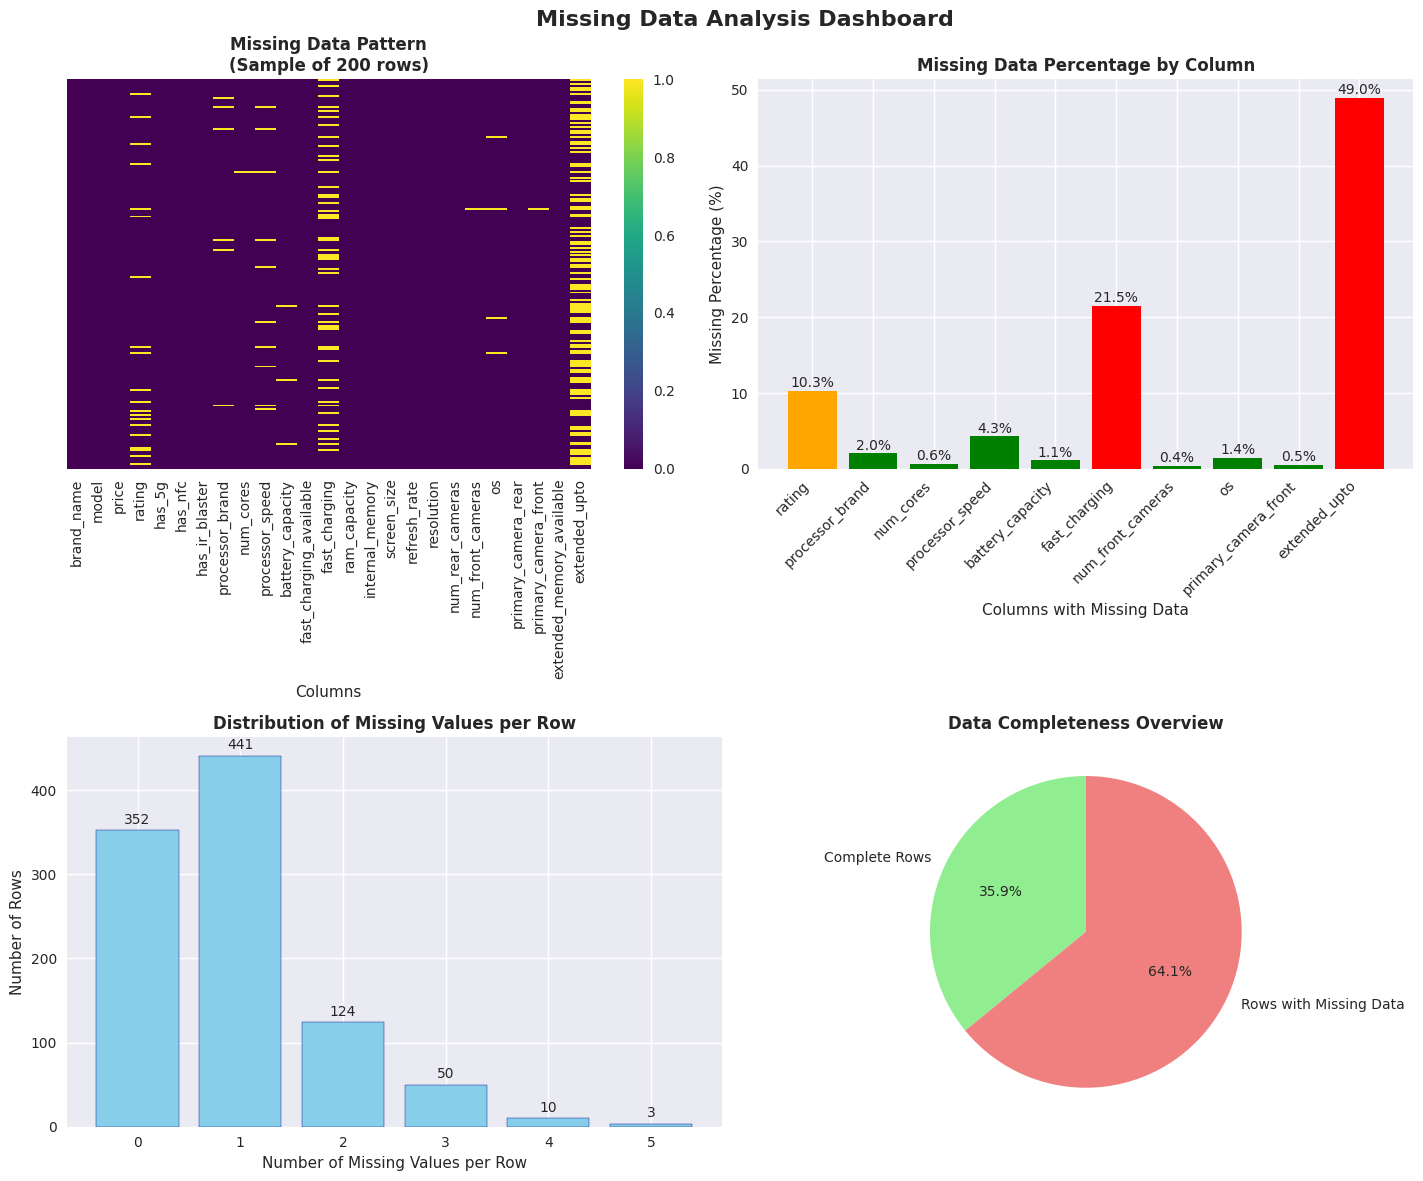


📊 VISUALIZATION INSIGHTS:
   • 10 columns have missing data
   • 5 is the maximum missing values in a single row
   • 35.9% of rows are complete
   • 628 rows would be lost if we drop all missing data


In [16]:
# 4. Visual Missing Data Analysis
def visualize_missing_data(df):
    """
    Create comprehensive visualizations for missing data patterns
    """
    missing_data = df.isnull().sum()
    missing_cols = missing_data[missing_data > 0]
    
    if len(missing_cols) == 0:
        print("No missing data to visualize!")
        return
    
    print("\n=== MISSING DATA VISUALIZATIONS ===")
    
    # Create subplot layout
    fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    fig.suptitle('Missing Data Analysis Dashboard', fontsize=16, fontweight='bold')
    
    # 1. Missing data heatmap (subset of data for clarity)
    sample_size = min(200, len(df))
    sample_df = df.sample(n=sample_size, random_state=42)
    
    sns.heatmap(sample_df.isnull(), 
                cbar=True, 
                yticklabels=False, 
                cmap='viridis',
                ax=axes[0,0])
    axes[0,0].set_title(f'Missing Data Pattern\n(Sample of {sample_size} rows)', fontweight='bold')
    axes[0,0].set_xlabel('Columns')
    
    # 2. Missing data percentage bar chart
    missing_pct = (missing_cols / len(df)) * 100
    bars = axes[0,1].bar(range(len(missing_pct)), missing_pct.values, 
                        color=['red' if x > 20 else 'orange' if x > 10 else 'green' for x in missing_pct.values])
    axes[0,1].set_title('Missing Data Percentage by Column', fontweight='bold')
    axes[0,1].set_xlabel('Columns with Missing Data')
    axes[0,1].set_ylabel('Missing Percentage (%)')
    axes[0,1].set_xticks(range(len(missing_pct)))
    axes[0,1].set_xticklabels(missing_pct.index, rotation=45, ha='right')
    
    # Add percentage labels on bars
    for i, bar in enumerate(bars):
        height = bar.get_height()
        axes[0,1].text(bar.get_x() + bar.get_width()/2., height + 0.1,
                       f'{height:.1f}%', ha='center', va='bottom')
    
    # 3. Missing values per row distribution
    missing_per_row = df.isnull().sum(axis=1)
    missing_dist = missing_per_row.value_counts().sort_index()
    
    axes[1,0].bar(missing_dist.index, missing_dist.values, color='skyblue', edgecolor='navy')
    axes[1,0].set_title('Distribution of Missing Values per Row', fontweight='bold')
    axes[1,0].set_xlabel('Number of Missing Values per Row')
    axes[1,0].set_ylabel('Number of Rows')
    
    # Add count labels on bars
    for i, (x, y) in enumerate(zip(missing_dist.index, missing_dist.values)):
        axes[1,0].text(x, y + max(missing_dist.values) * 0.01, str(y), ha='center', va='bottom')
    
    # 4. Missing data impact analysis
    complete_rows_pct = (len(df.dropna()) / len(df)) * 100
    data_completeness = [complete_rows_pct, 100 - complete_rows_pct]
    labels = ['Complete Rows', 'Rows with Missing Data']
    colors = ['lightgreen', 'lightcoral']
    
    wedges, texts, autotexts = axes[1,1].pie(data_completeness, labels=labels, colors=colors, 
                                            autopct='%1.1f%%', startangle=90)
    axes[1,1].set_title('Data Completeness Overview', fontweight='bold')
    
    plt.tight_layout()
    plt.show()
    
    # Summary statistics
    print(f"\n📊 VISUALIZATION INSIGHTS:")
    print(f"   • {len(missing_cols)} columns have missing data")
    print(f"   • {missing_per_row.max()} is the maximum missing values in a single row")
    print(f"   • {complete_rows_pct:.1f}% of rows are complete")
    print(f"   • {len(df) - len(df.dropna())} rows would be lost if we drop all missing data")

# Generate missing data visualizations
visualize_missing_data(df)

In [17]:
# 5. Practical Imputation Strategies with Examples
def demonstrate_imputation_strategies(df):
    """
    Demonstrate different imputation strategies with before/after comparison
    """
    print("\n=== PRACTICAL IMPUTATION DEMONSTRATION ===")
    
    # Work with a copy to preserve original data
    df_demo = df.copy()
    
    # Get columns with missing data
    missing_cols = df_demo.columns[df_demo.isnull().any()].tolist()
    
    if len(missing_cols) == 0:
        print("No missing data to demonstrate imputation!")
        return
    
    imputation_results = {}
    
    for col in missing_cols:
        print(f"\n📱 IMPUTING: {col.upper()}")
        print(f"   Data type: {df_demo[col].dtype}")
        print(f"   Missing values: {df_demo[col].isnull().sum()} ({df_demo[col].isnull().sum()/len(df_demo)*100:.1f}%)")
        
        # Store original missing count
        original_missing = df_demo[col].isnull().sum()
        
        # Choose imputation strategy based on data type and business logic
        if df_demo[col].dtype in ['int64', 'float64']:
            # Numerical imputation
            print(f"   📊 Statistical Summary:")
            print(f"      Mean: {df_demo[col].mean():.2f}")
            print(f"      Median: {df_demo[col].median():.2f}")
            print(f"      Std: {df_demo[col].std():.2f}")
            
            # Choose imputation method based on distribution
            skewness = df_demo[col].skew()
            print(f"      Skewness: {skewness:.2f}")
            
            if abs(skewness) < 0.5:
                # Normal distribution - use mean
                impute_value = df_demo[col].mean()
                strategy = "Mean (Normal distribution)"
            else:
                # Skewed distribution - use median
                impute_value = df_demo[col].median()
                strategy = "Median (Skewed distribution)"
            
            # Special case for specific columns
            if 'charging' in col.lower() and df_demo[col].median() > 0:
                # For charging speeds, use median as it's more realistic
                impute_value = df_demo[col].median()
                strategy = "Median (Domain knowledge: realistic charging speed)"
            
        else:
            # Categorical imputation
            mode_value = df_demo[col].mode()
            if len(mode_value) > 0:
                impute_value = mode_value[0]
                strategy = "Mode (Most frequent category)"
            else:
                impute_value = "Unknown"
                strategy = "Custom category (No clear mode)"
        
        print(f"   ✅ Strategy: {strategy}")
        print(f"   🎯 Impute value: {impute_value}")
        
        # Perform imputation
        df_demo[col].fillna(impute_value, inplace=True)
        
        # Verify imputation
        after_missing = df_demo[col].isnull().sum()
        print(f"   ✅ Result: {original_missing} → {after_missing} missing values")
        
        # Store results for summary
        imputation_results[col] = {
            'strategy': strategy,
            'impute_value': impute_value,
            'before_missing': original_missing,
            'after_missing': after_missing
        }
    
    return df_demo, imputation_results

# 6. Before/After Comparison Analysis
def compare_before_after_imputation(df_original, df_imputed, imputation_results):
    """
    Compare datasets before and after imputation
    """
    print("\n=== BEFORE/AFTER IMPUTATION COMPARISON ===")
    
    print(f"\n📊 OVERALL IMPACT:")
    print(f"   Original missing values: {df_original.isnull().sum().sum()}")
    print(f"   After imputation missing values: {df_imputed.isnull().sum().sum()}")
    print(f"   Complete rows: {len(df_original.dropna())} → {len(df_imputed.dropna())}")
    print(f"   Data completeness: {len(df_original.dropna())/len(df_original)*100:.1f}% → {len(df_imputed.dropna())/len(df_imputed)*100:.1f}%")
    
    print(f"\n📋 IMPUTATION SUMMARY:")
    for col, results in imputation_results.items():
        print(f"   {col}:")
        print(f"     Strategy: {results['strategy']}")
        print(f"     Value used: {results['impute_value']}")
        print(f"     Missing: {results['before_missing']} → {results['after_missing']}")
    
    # Statistical comparison for numerical columns
    numerical_cols = df_original.select_dtypes(include=['int64', 'float64']).columns
    imputed_numerical = [col for col in numerical_cols if col in imputation_results.keys()]
    
    if imputed_numerical:
        print(f"\n📊 STATISTICAL IMPACT ON NUMERICAL COLUMNS:")
        for col in imputed_numerical:
            print(f"   {col}:")
            print(f"     Mean: {df_original[col].mean():.2f} → {df_imputed[col].mean():.2f}")
            print(f"     Median: {df_original[col].median():.2f} → {df_imputed[col].median():.2f}")
            print(f"     Std: {df_original[col].std():.2f} → {df_imputed[col].std():.2f}")

# Demonstrate imputation strategies
df_imputed, imputation_results = demonstrate_imputation_strategies(df)
compare_before_after_imputation(df, df_imputed, imputation_results)


=== PRACTICAL IMPUTATION DEMONSTRATION ===

📱 IMPUTING: RATING
   Data type: float64
   Missing values: 101 (10.3%)
   📊 Statistical Summary:
      Mean: 78.26
      Median: 80.00
      Std: 7.40
      Skewness: -0.70
   ✅ Strategy: Median (Skewed distribution)
   🎯 Impute value: 80.0
   ✅ Result: 101 → 0 missing values

📱 IMPUTING: PROCESSOR_BRAND
   Data type: object
   Missing values: 20 (2.0%)
   ✅ Strategy: Mode (Most frequent category)
   🎯 Impute value: snapdragon
   ✅ Result: 20 → 0 missing values

📱 IMPUTING: NUM_CORES
   Data type: float64
   Missing values: 6 (0.6%)
   📊 Statistical Summary:
      Mean: 7.77
      Median: 8.00
      Std: 0.84
      Skewness: -3.76
   ✅ Strategy: Median (Skewed distribution)
   🎯 Impute value: 8.0
   ✅ Result: 6 → 0 missing values

📱 IMPUTING: PROCESSOR_SPEED
   Data type: float64
   Missing values: 42 (4.3%)
   📊 Statistical Summary:
      Mean: 2.43
      Median: 2.30
      Std: 0.46
      Skewness: 0.19
   ✅ Strategy: Mean (Normal distrib

/tmp/ipykernel_78028/125530333.py:69: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_demo[col].fillna(impute_value, inplace=True)
/tmp/ipykernel_78028/125530333.py:69: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try

In [18]:
# 7. Interview-Ready Imputation Strategies Guide
def interview_imputation_guide():
    """
    Comprehensive guide to imputation strategies for data science interviews
    """
    print("\n=== INTERVIEW-READY IMPUTATION STRATEGIES ===")
    
    strategies = {
        '🔢 NUMERICAL VARIABLES': {
            'Mean Imputation': {
                'when': 'Normal distribution, no outliers',
                'pros': 'Preserves mean, simple to implement',
                'cons': 'Reduces variance, may not be realistic',
                'code': 'df[col].fillna(df[col].mean())'
            },
            'Median Imputation': {
                'when': 'Skewed distribution, presence of outliers',
                'pros': 'Robust to outliers, more realistic',
                'cons': 'May not preserve original distribution',
                'code': 'df[col].fillna(df[col].median())'
            },
            'Mode Imputation': {
                'when': 'Discrete numerical data (ratings, counts)',
                'pros': 'Maintains most common value',
                'cons': 'May overrepresent popular values',
                'code': 'df[col].fillna(df[col].mode()[0])'
            },
            'Forward/Backward Fill': {
                'when': 'Time series data with temporal dependency',
                'pros': 'Maintains temporal patterns',
                'cons': 'Only works for ordered data',
                'code': 'df[col].fillna(method="ffill")'
            },
            'Interpolation': {
                'when': 'Time series with trends/seasonality',
                'pros': 'Captures underlying patterns',
                'cons': 'Assumes smooth transitions',
                'code': 'df[col].interpolate()'
            },
            'KNN Imputation': {
                'when': 'Complex relationships between variables',
                'pros': 'Uses similar observations, sophisticated',
                'cons': 'Computationally expensive, needs tuning',
                'code': 'from sklearn.impute import KNNImputer'
            },
            'Regression Imputation': {
                'when': 'Strong correlations with other variables',
                'pros': 'Uses relationship with other features',
                'cons': 'May overfit, complex implementation',
                'code': 'Use sklearn LinearRegression to predict'
            }
        },
        '📝 CATEGORICAL VARIABLES': {
            'Mode Imputation': {
                'when': 'Clear most frequent category exists',
                'pros': 'Simple, maintains distribution',
                'cons': 'May bias toward popular categories',
                'code': 'df[col].fillna(df[col].mode()[0])'
            },
            'Create "Unknown" Category': {
                'when': 'Missing might be informative',
                'pros': 'Preserves missingness information',
                'cons': 'Increases cardinality',
                'code': 'df[col].fillna("Unknown")'
            },
            'Random Sampling': {
                'when': 'Want to preserve original distribution',
                'pros': 'Maintains category proportions',
                'cons': 'Introduces randomness',
                'code': 'df[col].fillna(df[col].dropna().sample())'
            },
            'Business Rule Imputation': {
                'when': 'Domain knowledge suggests default',
                'pros': 'Realistic, business-aligned',
                'cons': 'Requires domain expertise',
                'code': 'df[col].fillna("Default_Value")'
            }
        }
    }
    
    for category, methods in strategies.items():
        print(f"\n{category}")
        print("=" * 50)
        
        for method, details in methods.items():
            print(f"\n📌 {method}:")
            print(f"   🎯 When to use: {details['when']}")
            print(f"   ✅ Pros: {details['pros']}")
            print(f"   ❌ Cons: {details['cons']}")
            print(f"   💻 Code: {details['code']}")
    
    print("\n=== DECISION FRAMEWORK ===")
    print("""
    📋 STEP-BY-STEP DECISION PROCESS:
    
    1. 🔍 ANALYZE MISSINGNESS:
       • <5%: Safe to impute or drop
       • 5-15%: Proceed with caution, investigate pattern
       • 15-30%: Deep investigation required
       • >30%: Consider dropping column
    
    2. 🎯 UNDERSTAND BUSINESS CONTEXT:
       • Why is data missing?
       • Is missingness informative?
       • What's the business impact?
    
    3. 🧮 CHOOSE STRATEGY:
       • Check data distribution
       • Consider relationship with other variables
       • Evaluate computational constraints
    
    4. ✅ VALIDATE APPROACH:
       • Compare before/after statistics
       • Test impact on downstream models
       • Document assumptions made
    """)

# Display interview guide
interview_imputation_guide()


=== INTERVIEW-READY IMPUTATION STRATEGIES ===

🔢 NUMERICAL VARIABLES

📌 Mean Imputation:
   🎯 When to use: Normal distribution, no outliers
   ✅ Pros: Preserves mean, simple to implement
   ❌ Cons: Reduces variance, may not be realistic
   💻 Code: df[col].fillna(df[col].mean())

📌 Median Imputation:
   🎯 When to use: Skewed distribution, presence of outliers
   ✅ Pros: Robust to outliers, more realistic
   ❌ Cons: May not preserve original distribution
   💻 Code: df[col].fillna(df[col].median())

📌 Mode Imputation:
   🎯 When to use: Discrete numerical data (ratings, counts)
   ✅ Pros: Maintains most common value
   ❌ Cons: May overrepresent popular values
   💻 Code: df[col].fillna(df[col].mode()[0])

📌 Forward/Backward Fill:
   🎯 When to use: Time series data with temporal dependency
   ✅ Pros: Maintains temporal patterns
   ❌ Cons: Only works for ordered data
   💻 Code: df[col].fillna(method="ffill")

📌 Interpolation:
   🎯 When to use: Time series with trends/seasonality
   ✅ Pros: C

## 6. Outlier Detection

**Key Interview Topics:**
- Statistical methods (IQR, Z-score)
- Visualization techniques
- Business context consideration
- Treatment strategies


=== OUTLIER ANALYSIS: PRICE ===
IQR Method: 107 outliers (10.9%)
Range: [-20739.75, 69230.25]

=== OUTLIER ANALYSIS: RATING ===
IQR Method: 0 outliers (0.0%)
Range: [59.00, 99.00]

=== OUTLIER ANALYSIS: NUM_CORES ===
IQR Method: 75 outliers (7.7%)
Range: [8.00, 8.00]

=== OUTLIER ANALYSIS: PROCESSOR_SPEED ===
IQR Method: 0 outliers (0.0%)
Range: [0.86, 4.03]

=== OUTLIER ANALYSIS: BATTERY_CAPACITY ===
IQR Method: 129 outliers (13.2%)
Range: [3750.00, 5750.00]

=== OUTLIER ANALYSIS: FAST_CHARGING_AVAILABLE ===
IQR Method: 143 outliers (14.6%)
Range: [1.00, 1.00]

=== OUTLIER ANALYSIS: FAST_CHARGING ===
IQR Method: 13 outliers (1.3%)
Range: [-54.00, 138.00]

=== OUTLIER ANALYSIS: RAM_CAPACITY ===
IQR Method: 11 outliers (1.1%)
Range: [-2.00, 14.00]

=== OUTLIER ANALYSIS: INTERNAL_MEMORY ===
IQR Method: 184 outliers (18.8%)
Range: [-32.00, 224.00]

=== OUTLIER ANALYSIS: SCREEN_SIZE ===
IQR Method: 113 outliers (11.5%)
Range: [6.25, 6.92]

=== OUTLIER ANALYSIS: REFRESH_RATE ===
IQR Method

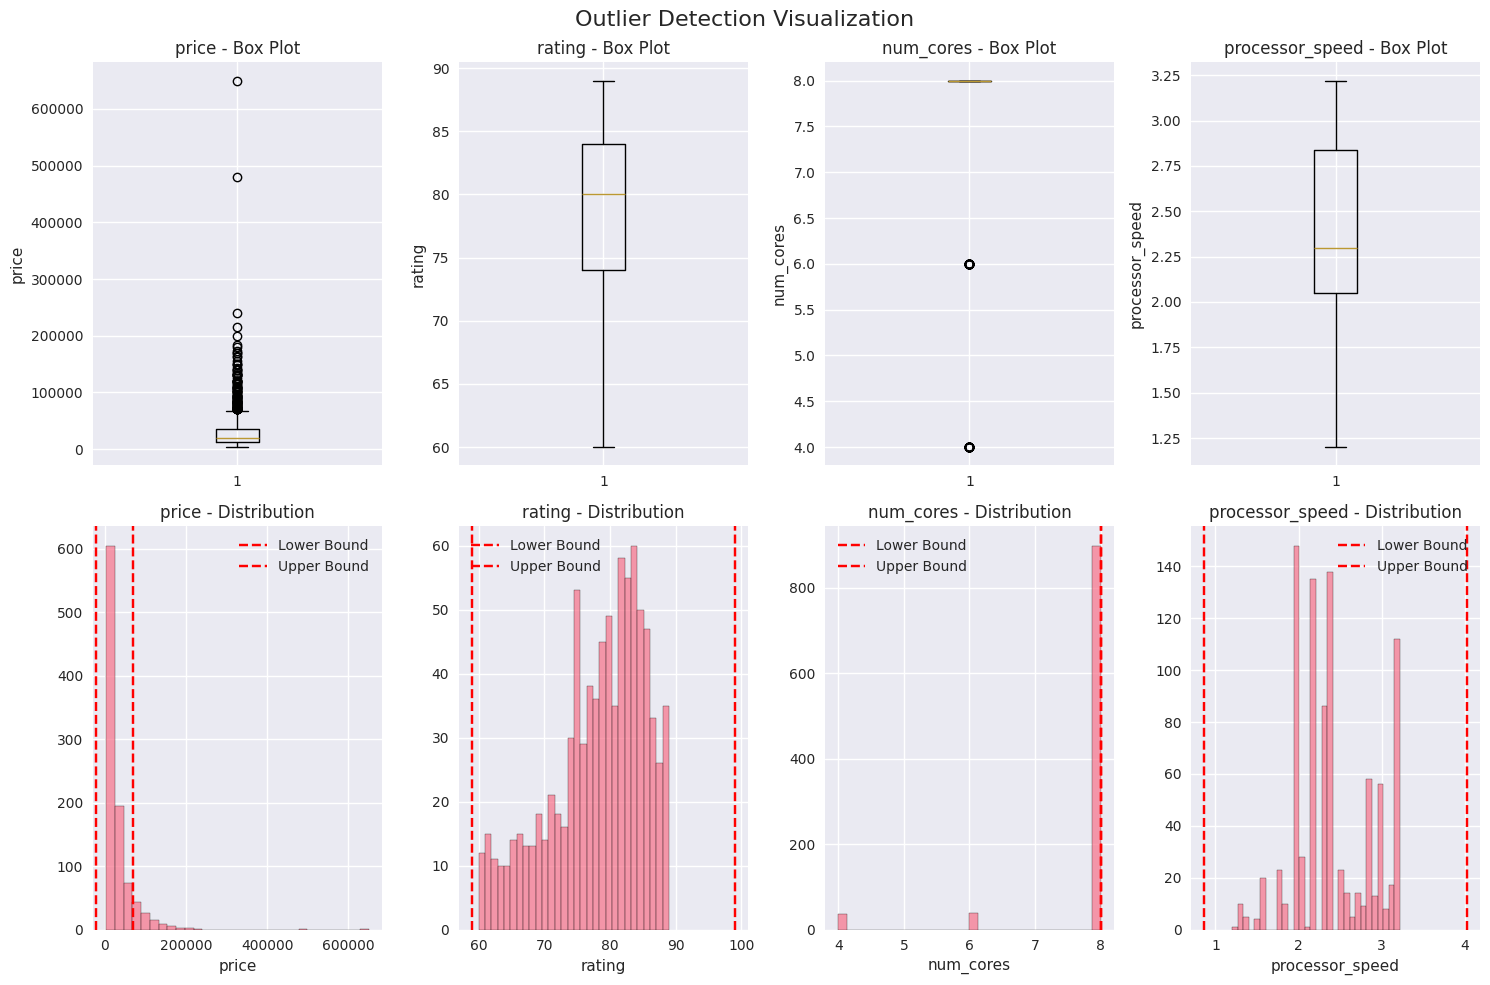

In [19]:
# Comprehensive Outlier Detection
def detect_outliers(df, numerical_cols):
    """
    Multiple outlier detection methods - common interview topic
    """
    outlier_summary = {}
    
    for col in numerical_cols:
        if df[col].dtype in ['int64', 'float64']:
            print(f"\n=== OUTLIER ANALYSIS: {col.upper()} ===")
            
            # Method 1: IQR Method
            Q1 = df[col].quantile(0.25)
            Q3 = df[col].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR
            
            iqr_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
            
            print(f"IQR Method: {len(iqr_outliers)} outliers ({len(iqr_outliers)/len(df)*100:.1f}%)")
            print(f"Range: [{lower_bound:.2f}, {upper_bound:.2f}]")
            
            outlier_summary[col] = {
                'iqr_outliers': len(iqr_outliers),
                'lower_bound': lower_bound,
                'upper_bound': upper_bound
            }
    
    return outlier_summary

# Outlier Detection Method 1: IQR (Interquartile Range)
def detect_outliers_iqr(df, column):
    """
    Detect outliers using IQR method
    """
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    
    print(f"IQR Method for {column}:")
    print(f"Q1: {Q1:.3f}, Q3: {Q3:.3f}, IQR: {IQR:.3f}")
    print(f"Lower bound: {lower_bound:.3f}, Upper bound: {upper_bound:.3f}")
    print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
    
    return outliers, lower_bound, upper_bound

# Visualize outliers
def visualize_outliers(df, numerical_cols, max_cols=4):
    """
    Create outlier visualization plots
    """
    if not numerical_cols:
        print("No numerical columns for outlier visualization")
        return
    
    cols_to_plot = numerical_cols[:max_cols]
    fig, axes = plt.subplots(2, len(cols_to_plot), figsize=(15, 10))
    fig.suptitle('Outlier Detection Visualization', fontsize=16)
    
    if len(cols_to_plot) == 1:
        axes = axes.reshape(-1, 1)
    
    for i, col in enumerate(cols_to_plot):
        # Box plot
        axes[0, i].boxplot(df[col].dropna())
        axes[0, i].set_title(f'{col} - Box Plot')
        axes[0, i].set_ylabel(col)
        
        # Histogram with outlier boundaries
        axes[1, i].hist(df[col].dropna(), bins=30, alpha=0.7, edgecolor='black')
        
        # Add outlier boundaries
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        axes[1, i].axvline(lower_bound, color='red', linestyle='--', label='Lower Bound')
        axes[1, i].axvline(upper_bound, color='red', linestyle='--', label='Upper Bound')
        axes[1, i].set_title(f'{col} - Distribution')
        axes[1, i].set_xlabel(col)
        axes[1, i].legend()
    
    plt.tight_layout()
    plt.show()

# Run outlier detection
if numerical_cols:
    outlier_summary = detect_outliers(df, numerical_cols)
    visualize_outliers(df, numerical_cols)
else:
    print("No numerical columns available for outlier detection")

In [20]:
# Outlier Detection Method 2: Z-Score
def detect_outliers_zscore(df, column, threshold=3):
    """
    Detect outliers using Z-Score method
    """
    z_scores = np.abs(stats.zscore(df[column].dropna()))
    outliers = df[z_scores > threshold]
    
    print(f"\nZ-Score Method for {column} (threshold: {threshold}):")
    print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
    print(f"Max Z-score: {z_scores.max():.3f}")
    
    return outliers

In [21]:
# Outlier Detection Method 3: Modified Z-Score
def detect_outliers_modified_zscore(df, column, threshold=3.5):
    """
    Detect outliers using Modified Z-Score (using median)
    """
    median = df[column].median()
    mad = np.median(np.abs(df[column] - median))
    
    if mad == 0:
        print(f"\nModified Z-Score: Cannot calculate (MAD = 0) for {column}")
        return df.iloc[0:0]  # Return empty dataframe
    
    modified_z_scores = 0.6745 * (df[column] - median) / mad
    outliers = df[np.abs(modified_z_scores) > threshold]
    
    print(f"\nModified Z-Score Method for {column} (threshold: {threshold}):")
    print(f"Median: {median:.3f}, MAD: {mad:.3f}")
    print(f"Number of outliers: {len(outliers)} ({len(outliers)/len(df)*100:.1f}%)")
    
    return outliers

In [22]:
# Comprehensive Outlier Analysis for All Numerical Columns
def analyze_outliers_all_methods(df, numerical_cols):
    """
    Apply all outlier detection methods to numerical columns
    """
    outlier_summary = {}
    
    for col in numerical_cols:
        if df[col].dtype in ['int64', 'float64']:
            print(f"\n{'='*50}")
            print(f"OUTLIER ANALYSIS: {col.upper()}")
            print(f"{'='*50}")
            
            # Method 1: IQR
            iqr_outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)
            
            # Method 2: Z-Score
            z_outliers = detect_outliers_zscore(df, col)
            
            # Method 3: Modified Z-Score
            modified_z_outliers = detect_outliers_modified_zscore(df, col)
            
            # Store summary
            outlier_summary[col] = {
                'iqr_outliers': len(iqr_outliers),
                'z_outliers': len(z_outliers),
                'modified_z_outliers': len(modified_z_outliers),
                'lower_bound': lower_bound,
                'upper_bound': upper_bound
            }
    
    return outlier_summary

In [23]:
# Outlier Visualization
def visualize_outliers_single_column(df, column):
    """
    Create comprehensive outlier visualizations for a single column
    """
    fig, axes = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(f'Outlier Analysis: {column}', fontsize=16)
    
    # 1. Box plot
    axes[0, 0].boxplot(df[column].dropna())
    axes[0, 0].set_title('Box Plot')
    axes[0, 0].set_ylabel(column)
    
    # 2. Histogram with outlier boundaries
    axes[0, 1].hist(df[column].dropna(), bins=30, alpha=0.7, edgecolor='black')
    
    # Add IQR boundaries
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    axes[0, 1].axvline(lower_bound, color='red', linestyle='--', label=f'Lower: {lower_bound:.2f}')
    axes[0, 1].axvline(upper_bound, color='red', linestyle='--', label=f'Upper: {upper_bound:.2f}')
    axes[0, 1].set_title('Distribution with IQR Bounds')
    axes[0, 1].set_xlabel(column)
    axes[0, 1].legend()
    
    # 3. Scatter plot with index
    axes[1, 0].scatter(df.index, df[column], alpha=0.6)
    axes[1, 0].axhline(lower_bound, color='red', linestyle='--')
    axes[1, 0].axhline(upper_bound, color='red', linestyle='--')
    axes[1, 0].set_title('Values vs Index')
    axes[1, 0].set_xlabel('Index')
    axes[1, 0].set_ylabel(column)
    
    # 4. Q-Q plot for normality check
    stats.probplot(df[column].dropna(), dist="norm", plot=axes[1, 1])
    axes[1, 1].set_title('Q-Q Plot (Normality Check)')
    
    plt.tight_layout()
    plt.show()

### Outlier Treatment Strategies

**When to Remove Outliers:**
- Data entry errors
- Measurement errors
- Values that don't make business sense

**When to Keep Outliers:**
- Outliers represent valuable insights (e.g., high-value customers)
- Domain knowledge suggests they are valid
- Small dataset where removing data is costly

**Transformation Options:**
- **Log transformation:** Reduces impact of extreme values
- **Winsorization:** Cap values at certain percentiles
- **Square root transformation:** Moderate reduction of outlier impact
- **Robust scaling:** Use median and IQR instead of mean and std

## 7. Common EDA Interview Questions & Answers

**This section covers frequently asked EDA questions in data science interviews**

### Q1: What are the first steps you take when given a new dataset?

**Answer:**
1. **Understand the Business Context** - What problem are we solving?
2. **Load and Inspect** - `df.head()`, `df.info()`, `df.shape`
3. **Data Quality Check** - Missing values, duplicates, data types
4. **Statistical Summary** - `df.describe()` for numerical, value counts for categorical
5. **Visualize Distributions** - Histograms, box plots, bar charts
6. **Check Relationships** - Correlation matrix, scatter plots
7. **Document Findings** - Key insights and data quality issues

### Q2: How do you handle missing data?

**Answer:**
1. **Analyze the Pattern** - Random, systematic, or informative missingness?
2. **Assess Impact** - How much data is missing? Which variables?
3. **Choose Strategy Based on:**
   - **Type of variable** (numerical vs categorical)
   - **Amount of missingness** (<5% vs >30%)
   - **Business context** (can we collect more data?)
   - **Downstream model requirements**

**Common Strategies:**
- **Deletion:** If <5% missing and random
- **Imputation:** Mean/median for numerical, mode for categorical
- **Advanced:** KNN, regression imputation, multiple imputation
- **Create indicator:** Missing value as a feature

### Q3: How do you detect and handle outliers?

**Answer:**
1. **Detection Methods:**
   - **Statistical:** IQR rule, Z-score (>3), Modified Z-score
   - **Visual:** Box plots, scatter plots, histograms
   - **Domain-specific:** Business rules and logic

2. **Treatment Options:**
   - **Remove:** If data entry errors or measurement errors
   - **Transform:** Log transformation, winsorization
   - **Keep:** If outliers are meaningful (e.g., high-value customers)
   - **Separate Analysis:** Analyze outliers separately

3. **Key Consideration:** Always consider business context!

### Q4: How do you check if a distribution is normal?

**Answer:**
1. **Visual Methods:**
   - Histogram (bell-shaped?)
   - Q-Q plot (points on diagonal line?)
   - Box plot (symmetric?)

2. **Statistical Tests:**
   - **Shapiro-Wilk test** (n<5000): H0 = normal distribution
   - **Kolmogorov-Smirnov test**
   - **Anderson-Darling test**

3. **Numerical Indicators:**
   - **Skewness:** ~0 for normal (-0.5 to 0.5 acceptable)
   - **Kurtosis:** ~3 for normal (excess kurtosis ~0)
   - **Mean ≈ Median** for normal distribution

### Q5: What's the difference between correlation and causation?

**Answer:**
- **Correlation:** Statistical relationship between variables (X and Y move together)
- **Causation:** One variable directly affects another (X causes Y)

**Key Points:**
- Correlation ≠ Causation
- Need experimental design or causal inference methods for causation
- Confounding variables can create spurious correlations
- Always consider: "Could there be a third variable causing both?"

### Q6: How do you handle high cardinality categorical variables?

**Answer:**
1. **Frequency-based grouping:** Group rare categories into "Other"
2. **Domain knowledge grouping:** Combine similar categories
3. **Target encoding:** Replace categories with target mean (be careful of overfitting)
4. **Embedding:** For deep learning models
5. **Feature hashing:** For very high cardinality
6. **Remove:** If too sparse and not informative

**Rule of thumb:** If category frequency < 1-5%, consider grouping

In [24]:
# EDA Pipeline Step 1: Dataset Overview
def eda_step1_overview(df):
    """
    Step 1: Basic dataset information
    """
    print("🔍 STEP 1: DATASET OVERVIEW")
    print("="*50)
    print(f"Shape: {df.shape}")
    print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print(f"Number of rows: {df.shape[0]:,}")
    print(f"Number of columns: {df.shape[1]}")
    
    return df.shape

# Run Step 1
if 'df' in locals():
    shape_info = eda_step1_overview(df)
else:
    print("Please load a dataset first")

🔍 STEP 1: DATASET OVERVIEW
Shape: (980, 25)
Memory usage: 0.45 MB
Number of rows: 980
Number of columns: 25


In [25]:
# EDA Pipeline Step 2: Data Quality Assessment
def eda_step2_data_quality(df):
    """
    Step 2: Comprehensive data quality analysis
    """
    print("🔧 STEP 2: DATA QUALITY ASSESSMENT")
    print("="*50)
    
    info_df = pd.DataFrame({
        'Data_Type': df.dtypes,
        'Non_Null_Count': df.count(),
        'Null_Count': df.isnull().sum(),
        'Null_Percentage': (df.isnull().sum() / len(df)) * 100,
        'Unique_Values': df.nunique(),
        'Unique_Ratio': df.nunique() / len(df)
    })
    
    print("Data Quality Summary:")
    print(info_df)
    
    # Highlight issues
    high_null = info_df[info_df['Null_Percentage'] > 10]
    if len(high_null) > 0:
        print(f"\n⚠️  Columns with >10% missing data: {list(high_null.index)}")
    
    return info_df

# Run Step 2
if 'df' in locals():
    quality_info = eda_step2_data_quality(df)

🔧 STEP 2: DATA QUALITY ASSESSMENT
Data Quality Summary:
                          Data_Type  Non_Null_Count  Null_Count  \
brand_name                   object             980           0   
model                        object             980           0   
price                         int64             980           0   
rating                      float64             879         101   
has_5g                         bool             980           0   
has_nfc                        bool             980           0   
has_ir_blaster                 bool             980           0   
processor_brand              object             960          20   
num_cores                   float64             974           6   
processor_speed             float64             938          42   
battery_capacity            float64             969          11   
fast_charging_available       int64             980           0   
fast_charging               float64             769         211   
ram_ca

In [26]:
# EDA Pipeline Step 3: Variable Type Classification
def eda_step3_variable_types(df, target_column=None):
    """
    Step 3: Classify variables by type
    """
    print("📋 STEP 3: VARIABLE TYPE CLASSIFICATION")
    print("="*50)
    
    numerical_vars = df.select_dtypes(include=[np.number]).columns.tolist()
    categorical_vars = df.select_dtypes(include=['object']).columns.tolist()
    
    if target_column and target_column in numerical_vars:
        numerical_vars.remove(target_column)
    elif target_column and target_column in categorical_vars:
        categorical_vars.remove(target_column)
    
    print(f"📈 Numerical variables ({len(numerical_vars)}): {numerical_vars}")
    print(f"📊 Categorical variables ({len(categorical_vars)}): {categorical_vars}")
    if target_column:
        print(f"🎯 Target variable: {target_column}")
    
    return numerical_vars, categorical_vars

# Run Step 3
if 'df' in locals():
    num_vars, cat_vars = eda_step3_variable_types(df)

📋 STEP 3: VARIABLE TYPE CLASSIFICATION
📈 Numerical variables (17): ['price', 'rating', 'num_cores', 'processor_speed', 'battery_capacity', 'fast_charging_available', 'fast_charging', 'ram_capacity', 'internal_memory', 'screen_size', 'refresh_rate', 'num_rear_cameras', 'num_front_cameras', 'primary_camera_rear', 'primary_camera_front', 'extended_memory_available', 'extended_upto']
📊 Categorical variables (5): ['brand_name', 'model', 'processor_brand', 'resolution', 'os']


In [27]:
# EDA Pipeline Step 4: Statistical Summary
def eda_step4_statistical_summary(df, numerical_vars):
    """
    Step 4: Generate statistical summaries
    """
    print("📉 STEP 4: STATISTICAL SUMMARY")
    print("="*50)
    
    if numerical_vars:
        print("\nNumerical Variables Summary:")
        summary_stats = df[numerical_vars].describe()
        print(summary_stats)
        
        # Additional insights
        print("\nAdditional Statistics:")
        for col in numerical_vars:
            skewness = df[col].skew()
            kurtosis = df[col].kurtosis()
            print(f"{col}: Skewness = {skewness:.3f}, Kurtosis = {kurtosis:.3f}")
        
        return summary_stats
    else:
        print("No numerical variables found")
        return None

# Run Step 4
if 'df' in locals() and 'num_vars' in locals():
    stats_summary = eda_step4_statistical_summary(df, num_vars)

📉 STEP 4: STATISTICAL SUMMARY

Numerical Variables Summary:
               price      rating   num_cores  processor_speed  \
count     980.000000  879.000000  974.000000       938.000000   
mean    32520.504082   78.258248    7.772074         2.427217   
std     39531.812669    7.402854    0.836845         0.464090   
min      3499.000000   60.000000    4.000000         1.200000   
25%     12999.000000   74.000000    8.000000         2.050000   
50%     19994.500000   80.000000    8.000000         2.300000   
75%     35491.500000   84.000000    8.000000         2.840000   
max    650000.000000   89.000000    8.000000         3.220000   

       battery_capacity  fast_charging_available  fast_charging  ram_capacity  \
count        969.000000               980.000000     769.000000    980.000000   
mean        4817.748194                 0.854082      46.126138      6.560204   
std         1009.540054                 0.353205      34.277870      2.744378   
min         1821.000000       

In [28]:
# EDA Pipeline Step 5: Key Insights Generation
def eda_step5_key_insights(df, numerical_vars, categorical_vars, quality_info):
    """
    Step 5: Generate key insights and recommendations
    """
    print("💡 STEP 5: KEY INSIGHTS & RECOMMENDATIONS")
    print("="*50)
    
    insights = []
    
    # Missing data insights
    high_missing = quality_info[quality_info['Null_Percentage'] > 10]
    if len(high_missing) > 0:
        insights.append(f"⚠️  {len(high_missing)} variables have >10% missing data")
    
    # High cardinality insights
    high_cardinality = quality_info[(quality_info['Unique_Ratio'] > 0.5) & 
                                   (quality_info.index.isin(categorical_vars))]
    if len(high_cardinality) > 0:
        insights.append(f"⚠️  {len(high_cardinality)} categorical variables have high cardinality")
    
    # Skewness insights
    if numerical_vars:
        skewed_vars = []
        for var in numerical_vars:
            if abs(df[var].skew()) > 1:
                skewed_vars.append(var)
        if skewed_vars:
            insights.append(f"📊 {len(skewed_vars)} numerical variables are highly skewed: {skewed_vars}")
    
    # Data completeness
    complete_rows = df.dropna().shape[0]
    completeness_pct = (complete_rows / len(df)) * 100
    insights.append(f"📊 Data completeness: {completeness_pct:.1f}% of rows are complete")
    
    if not insights:
        insights.append("✅ No major data quality issues detected")
    
    print("\nKey Findings:")
    for i, insight in enumerate(insights, 1):
        print(f"{i}. {insight}")
    
    return insights

# Run Step 5
if all(var in locals() for var in ['df', 'num_vars', 'cat_vars', 'quality_info']):
    key_insights = eda_step5_key_insights(df, num_vars, cat_vars, quality_info)

In [29]:
# Complete EDA Pipeline Runner
def run_complete_eda_pipeline(df, target_column=None):
    """
    Run the complete EDA pipeline in sequence
    """
    print("🚀 RUNNING COMPLETE EDA PIPELINE")
    print("="*60)
    
    # Step 1: Overview
    shape_info = eda_step1_overview(df)
    print("\n")
    
    # Step 2: Data Quality
    quality_info = eda_step2_data_quality(df)
    print("\n")
    
    # Step 3: Variable Types
    num_vars, cat_vars = eda_step3_variable_types(df, target_column)
    print("\n")
    
    # Step 4: Statistical Summary
    stats_summary = eda_step4_statistical_summary(df, num_vars)
    print("\n")
    
    # Step 5: Key Insights
    insights = eda_step5_key_insights(df, num_vars, cat_vars, quality_info)
    
    return {
        'shape': shape_info,
        'quality': quality_info,
        'numerical_vars': num_vars,
        'categorical_vars': cat_vars,
        'stats': stats_summary,
        'insights': insights
    }

# Demonstrate the complete pipeline
print("\n" + "="*60)
print("COMPLETE EDA PIPELINE DEMONSTRATION")
print("="*60)

# Run the complete pipeline
if 'df' in locals():
    pipeline_results = run_complete_eda_pipeline(df)
else:
    print("Please load a dataset first to run the complete pipeline")


COMPLETE EDA PIPELINE DEMONSTRATION
🚀 RUNNING COMPLETE EDA PIPELINE
🔍 STEP 1: DATASET OVERVIEW
Shape: (980, 25)
Memory usage: 0.45 MB
Number of rows: 980
Number of columns: 25


🔧 STEP 2: DATA QUALITY ASSESSMENT
Data Quality Summary:
                          Data_Type  Non_Null_Count  Null_Count  \
brand_name                   object             980           0   
model                        object             980           0   
price                         int64             980           0   
rating                      float64             879         101   
has_5g                         bool             980           0   
has_nfc                        bool             980           0   
has_ir_blaster                 bool             980           0   
processor_brand              object             960          20   
num_cores                   float64             974           6   
processor_speed             float64             938          42   
battery_capacity            

## 8. EDA Interview Tips & Best Practices

### 🎯 **Do's:**
1. **Always start with business understanding** - What problem are we solving?
2. **Follow a systematic approach** - Don't jump around randomly
3. **Communicate findings clearly** - Tell a story with your data
4. **Consider domain knowledge** - Statistics + business context = insights
5. **Document assumptions** - What are you assuming about the data?
6. **Think about next steps** - How will EDA inform modeling decisions?

### ❌ **Don'ts:**
1. **Don't ignore data quality** - Always check missing values, duplicates
2. **Don't over-engineer during EDA** - Save complex transformations for preprocessing
3. **Don't forget about outliers** - They can significantly impact models
4. **Don't assume correlation = causation** - Always clarify this distinction
5. **Don't create too many visualizations** - Focus on meaningful ones

### 🔥 **Pro Tips for Interviews:**
1. **Code while explaining** - Narrate your thought process
2. **Ask clarifying questions** - "Should I focus on any specific variables?"
3. **Prioritize based on time** - "Given 30 minutes, I'll focus on X, Y, Z"
4. **Show different approaches** - "We could also use method Y, but I chose X because..."
5. **Connect to business impact** - "This finding suggests we should..."

### 📚 **Key Concepts to Master:**
- Data types and their implications
- Missing data patterns and handling
- Distribution shapes and transformations
- Correlation vs causation
- Outlier detection and treatment
- Statistical significance
- Visualization best practices
- Feature engineering insights

---

**Remember:** EDA is both an art and a science. Practice these techniques on different datasets to build intuition! 🚀

## 📋 Notebook Structure Summary

This notebook is now organized into **focused, individual cells** for better learning:

### 🔍 **Section 1: Data Loading & Exploration**
- Import libraries
- Load dataset
- Basic info and shape
- Statistical summary

### 🔧 **Section 2: Data Quality Assessment**
- Missing values analysis
- Duplicate detection
- Data types validation
- Memory usage

### 📊 **Section 3: Univariate Analysis**
- Distribution patterns explanation
- Numerical variable analysis function
- Categorical variable analysis function
- Separate visualization functions
- Example executions

### 📈 **Section 4: Bivariate Analysis**
- Correlation analysis function
- Correlation interpretation guidelines
- Categorical vs numerical analysis
- ANOVA test function
- Visualization functions
- Example executions

### 🔍 **Section 5: Missing Data Analysis**
- Types of missing data explanation
- Missing data analysis function
- Imputation strategies
- Visualization

### ⚠️ **Section 6: Outlier Detection**
- IQR method function
- Z-score method function
- Modified Z-score method function
- Comprehensive analysis function
- Visualization functions
- Treatment strategies

### 🎯 **Section 7: Interview Q&A**
- Common questions and answers
- Best practices
- Pro tips

### 🚀 **Section 8: Complete EDA Pipeline**
- Step 1: Dataset Overview
- Step 2: Data Quality Assessment
- Step 3: Variable Type Classification
- Step 4: Statistical Summary
- Step 5: Key Insights Generation
- Complete Pipeline Runner

**Each concept is now in its own cell for easy understanding and execution!** 🎉